In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import namedtuple
from skimage.filters import threshold_local
from skimage import segmentation
from skimage import measure
from imutils import perspective
import imutils
import os
import string

import easyocr
reader = easyocr.Reader(['en'])

%matplotlib inline

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
train_data_dir = os.path.join("Data Train for BDC 2023 - Penyisihan/train")
test_data_dir = os.path.join("Data Train for BDC 2023 - Penyisihan/test")

In [3]:
classes = list(string.ascii_uppercase)

for i in range(0, 10):
  classes.append(str(i))

numeric_classes = [i for i in range(len(classes))]

labeltoidx = dict(zip(classes, numeric_classes))
idxtolabel = dict(zip(numeric_classes, classes))

In [4]:
df_train = pd.read_csv('DataTrain.csv', delimiter=";")
df_train.head()

,Unnamed: 0,Vehicleregistrationplate,NameofFile
0,0,A7814,DataTrain1.png
1,1,B1074QO,DataTrain2.png
2,2,B1031QO,DataTrain3.png
3,3,B187EDA,DataTrain4.png
4,4,B1089VD,DataTrain5.png


In [5]:
df_test = pd.read_csv('DataTest.csv', delimiter=";")
df_test.head()

,Unnamed: 0,Name of File
0,0,DataTest1.png
1,1,DataTest2.png
2,2,DataTest3.png
3,3,DataTest4.png
4,4,DataTest5.png


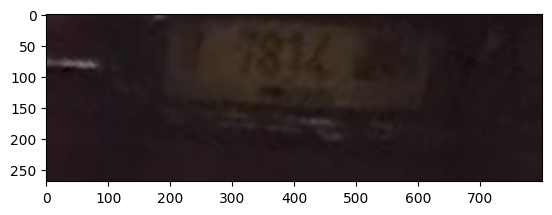

In [6]:
img = cv2.imread(os.path.join(train_data_dir, 'DataTrain1.png'))
r = 800.0 / img.shape[1]
dim = (800, int(img.shape[0]*r))
img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(gray)

### adjust contrast by histogram stretching:

In [7]:
# img = cv2.imread(os.path.join(train_data_dir, 'DataTrain1.png'))
# r = 800.0 / img.shape[1]
# dim = (800, int(img.shape[0]*r))
# img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

# # Calculate the minimum and maximum pixel values
# min_val = np.min(gray)
# max_val = np.max(gray)

# # Perform contrast stretching
# stretched = (gray - min_val) * (255.0 / (max_val - min_val))
# stretched = np.clip(stretched, 0, 255).astype(np.uint8)

# # Convert back to color (optional)
# stretched_color = cv2.cvtColor(stretched, cv2.COLOR_GRAY2BGR)

# plt.imshow(stretched_color,cmap='gray', vmin=0, vmax=255)

In [8]:
# hasil = reader.readtext(stretched_color)
# hasil

### histogram equalization for lighting correction:

(640, 640, 3)


[]

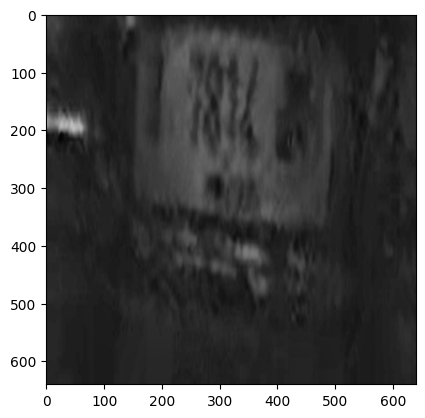

In [9]:
# Load the image
img = cv2.imread(os.path.join(train_data_dir, 'DataTrain1.png'))
# x = 640.0
# r = x / img.shape[1]
# dim = (int(x), int(img.shape[0]*r))
dim = (640,640)
img = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_equalized = clahe.apply(gray)

#convert to colorful
# clahe_equalized = cv2.cvtColor(clahe_equalized,cv2.COLOR_GRAY2BGR)
clahe_equalized_color = cv2.cvtColor(clahe_equalized, cv2.COLOR_GRAY2RGB)
plt.imshow(clahe_equalized_color,cmap='gray', vmin=0, vmax=255)
print(clahe_equalized_color.shape)
reader.readtext(clahe_equalized_color)

### New Image

In [34]:
SAVED_DIR = 'D:/Pemrograman/Python/Project/BDC-2023/02-dataset_640/val/'

for i in os.listdir('D:/Pemrograman/Python/Project/BDC-2023/Data Test for BDC 2023 - Penyisihan/'):
    print(i)
    img = cv2.imread(os.path.join('D:/Pemrograman/Python/Project/BDC-2023/Data Test for BDC 2023 - Penyisihan/',i))
    r = 640.0 / img.shape[1]
    dim = (640, int(img.shape[0]*r))
    
    if img.shape[1] > 640:
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    else:
        img = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply adaptive histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_equalized = clahe.apply(gray)
    gray = cv2.bilateralFilter(clahe_equalized, 11, 17, 17)

    kernel = np.array([[-1,-1,-1],
                        [-1, 9,-1],
                        [-1,-1,-1]])
    deconvolved = cv2.filter2D(gray, -1,kernel)
    
    
    clahe_equalized_color = cv2.cvtColor(deconvolved, cv2.COLOR_GRAY2RGB)
    cv2.imwrite(os.path.join(SAVED_DIR,i),clahe_equalized_color)

DataTest1.png
DataTest10.png
DataTest100.png
DataTest11.png
DataTest12.png
DataTest13.png
DataTest14.png
DataTest15.png
DataTest16.png
DataTest17.png
DataTest18.png
DataTest19.png
DataTest2.png
DataTest20.png
DataTest21.png
DataTest22.png
DataTest23.png
DataTest24.png
DataTest25.png
DataTest26.png
DataTest27.png
DataTest28.png
DataTest29.png
DataTest3.png
DataTest30.png
DataTest31.png
DataTest32.png
DataTest33.png
DataTest34.png
DataTest35.png
DataTest36.png
DataTest37.png
DataTest38.png
DataTest39.png
DataTest4.png
DataTest40.png
DataTest41.png
DataTest42.png
DataTest43.png
DataTest44.png
DataTest45.png
DataTest46.png
DataTest47.png
DataTest48.png
DataTest49.png
DataTest5.png
DataTest50.png
DataTest51.png
DataTest52.png
DataTest53.png
DataTest54.png
DataTest55.png
DataTest56.png
DataTest57.png
DataTest58.png
DataTest59.png
DataTest6.png
DataTest60.png
DataTest61.png
DataTest62.png
DataTest63.png
DataTest64.png
DataTest65.png
DataTest66.png
DataTest67.png
DataTest68.png
DataTest69.png


### add to data test

In [30]:
import random

list_random = random.sample(range(1, 801), 160)

In [32]:
import shutil

for i in list_random:
    img = f'DataTrain{i}.png'
    print(img)
    shutil.move(f'D:/Pemrograman/Python/Project/BDC-2023/02-dataset_320/train/{img}',f'D:/Pemrograman/Python/Project/BDC-2023/02-dataset_320/test/{img}')   

DataTrain561.png
DataTrain624.png
DataTrain663.png
DataTrain343.png
DataTrain417.png
DataTrain164.png
DataTrain146.png
DataTrain182.png
DataTrain740.png
DataTrain666.png
DataTrain754.png
DataTrain72.png
DataTrain797.png
DataTrain661.png
DataTrain150.png
DataTrain686.png
DataTrain122.png
DataTrain316.png
DataTrain559.png
DataTrain654.png
DataTrain279.png
DataTrain599.png
DataTrain304.png
DataTrain603.png
DataTrain564.png
DataTrain269.png
DataTrain331.png
DataTrain768.png
DataTrain40.png
DataTrain751.png
DataTrain389.png
DataTrain528.png
DataTrain222.png
DataTrain276.png
DataTrain420.png
DataTrain368.png
DataTrain617.png
DataTrain541.png
DataTrain552.png
DataTrain590.png
DataTrain689.png
DataTrain183.png
DataTrain522.png
DataTrain428.png
DataTrain286.png
DataTrain194.png
DataTrain326.png
DataTrain618.png
DataTrain187.png
DataTrain480.png
DataTrain438.png
DataTrain104.png
DataTrain338.png
DataTrain278.png
DataTrain591.png
DataTrain48.png
DataTrain750.png
DataTrain8.png
DataTrain554.png
Da

### Used

[([[231, 9], [393, 9], [393, 101], [231, 101]], '7812', 0.03906949609518051)]

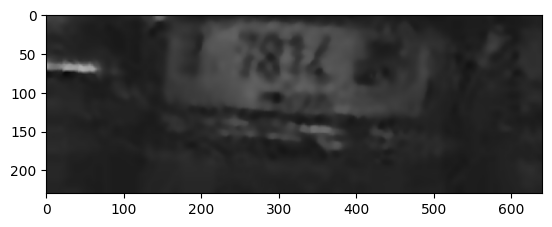

In [ ]:
# Load the image
img = cv2.imread(os.path.join(train_data_dir, 'DataTrain1.png'))
r = 320.0 / img.shape[1]
dim = (320, int(img.shape[0]*r))
# dim = (640,230)
img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_equalized = clahe.apply(gray)

gray = cv2.bilateralFilter(clahe_equalized, 11, 17, 17)

# Convert back to color (optional)
const_equal = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
plt.imshow(const_equal,cmap='gray', vmin=0, vmax=255)
hasil = reader.readtext(const_equal)
hasil

In [12]:
# from transformers import TrOCRProcessor
# processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

In [14]:
from PIL import Image
image = Image.open(os.path.join(train_data_dir, 'DataTrain1.png')).convert("RGB")